# Tic Tac Toe and Deep Learning
## Overview
The objective of this notebook is to train an AI agent to play Tic Tac Toe.  The AI Agent knows nothing about Tic Tac Toe, it does not know any of the rules of the game or know that it is even playing a game.  The AI agent will play multiple games of Tic Tac Toe and will learn from it. The Tac Tac Toe game will allow the Agent to play a move on one of the 9 positions on a Tic Tac Toe board.  The game will then check if this position is already filled (therefore invalid move) and if filled, will ask for a new move to be played. If the position is not already filled, the game will check if this leads to a win, if the game has been won, the game gives feedback that it was won. 

The actual game code is contained in the script <strong>ttt.py</strong>.  The gameplay in <strong>ttt.py</strong> allows for generating game data which will be reformatted in this notebook and used as training data. The actual machine learning code is contained in this Notebook.  The machine learning method that will be used is deep learning.  Using Keras a sequential neural network will be created and then training on gameplay data.  There will be three methods for evaluating the neural network, first the actual training accuracy, then based on the ability to play against an untrained agent and lastly a subjective analysis of the Agent playing against a human.

<img src="http://d5mit.co.za/images/TTT.gif">



## Approach
The process that is followed in this notebook is firstly to explore the data and to understand the concept. The next step is to train Agent S on gameplay data. After that a new Agent will be trained, Agent L, which is an improvement on Agent S' ability to play Tic Tac Toe.  Lastly in the conclusion the AI Agent will be evaluated and it will also allow a human to play against the AI agent.

1. [Understanding the concept and exploring the data](#_1)<br>
2. [Generate training data and train Agent S](#_2)<br>
    2.1 [Create training data](#_21)<br>
    2.2 [Train model S](#_22)<br>
    2.3 [Agent S evaluation and conclusion](#_23)<br>
3. [Generate training data and train Agent L (improvement on Agent S)](#_3)   <br>
    3.1 [Create training data](#_31)<br>
    3.2 [Train model L](#_32)<br>
    3.3 [Agent L evaluation and conclusion](#_33)<br>
4. [Conclusion](#_4)<br>
    4.1 [Evaluate AI agents](#_41)<br>
    4.2 [Play against Agent L](#_42)


## Evaluation (Step 3.3)
In order to do the final evaluation in step 3.3, an untrained agent played Tic Tac Toe against the trained Agent L. The untrained agent wins and trained agent wins are recorded.<br>

<strong>Metric</strong><br>
The data provided contains the untrained agent wins and trained agent wins. 
This is the metric used in order to determine which player is better at playing Tic Tac Toe.
<br>

<strong>Objective</strong><br>
The objective is to check if the trained Agent L is signitifantly better at playing Tic Tac Toe than an untrained Agent. 
<br>

<strong>Hypothesis</strong><br>
H0: trained_agent_wins - unrained_agent_wins = 0 <br>
H1: trained_agent_wins - unrained_agent_wins > 0    


## Parameters
The parameters in the cell below manages the notebook in terms of what code is executed and what gameplay files are used in order to train on. This can be changed as required.

<strong>Very important!!!!!</strong><br>
Setting all these parameters to True in the section below, will lead to the notebook running rather long.<br> 
- do_gen_ifile_UU -> set to true if untrained agent should play against untrained agent
- do_gen_ifile_US -> set to true if untrained agent should play against untrained agent
- do_gen_ifile_SS -> set to true if untrained agent should play against agent S
- do_gen_ifile_SH -> set to True if agent S should play against agent S 
- do_train_modelS -> set to True if agent s vs human game should be played
- do_train_modelL -> set to True if model S should be trained 
- do_final_evaluL -> set to True if the final evaluation should be executed 

In [1]:
# What to run
# if you want to run the full notebook with all funtion this must all be set to true.  
# Note the notebook can run rather long therefore it is split.
do_gen_ifile_UU = True                        # set to true if untrained agent should play against untrained agent
do_gen_ifile_US = True                        # set to true if untrained agent should play against agent S
do_gen_ifile_SS = True                        # set to True if agent S should play against agent S 
do_gen_ifile_SH = True                        # set to True if agent s vs human game should be played
do_train_modelS = True                        # set to True if model S should be trained         
do_train_modelL = True                        # set to True if model L should be trained 
do_final_evaluL = True                        # set to True if the final evaluation should be executed 

# you can manually add training files in these lists
# Training data files:
# untrained vs untrained agent games:
ifiles_UU = ['TrainingData/games_played_UU_14022021192742.csv',       
             'TrainingData/games_played_UU_14022021193021.csv',
             'TrainingData/games_played_UU_14022021200945.csv',
             'TrainingData/games_played_UU_14022021201410.csv',
             'TrainingData/games_played_UU_14022021201623.csv',
             'TrainingData/games_played_UU_14022021202502.csv']

# untrained agent vs human game games:
ifiles_UH = ['TrainingData/games_played_UH_all.csv']

# untrained agent vs agent S games:
ifiles_US = ['TrainingData/games_played_US_15022021092905.csv']

# agent S vs agent S games:
ifiles_SS = ['TrainingData/games_played_SS_16022021162932.csv',
             'TrainingData/games_played_SS_17022021002609.csv',
             'TrainingData/games_played_SS_17022021075317.csv',
             'TrainingData/games_played_SS_17022021091704.csv']

## Imports and initiate variables
The imports and some variables used in the notebook is defined in the cell below.  Note that all the actual Tic Tac Toe gameplay code is in the script <strong>ttt.py</strong>.  Some unit testing was also included and can be run by excecuting <strong>pytest</strong> form the console. 

In [2]:
# Imports
import ttt
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from numpy import savetxt
from datetime import date 
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
# remember to add sklearn

# set some notebook settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# default arrays
# x columns
x_columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18']

# y columns
y_columns = ['y1','y2','y3','y4','y5','y6','y7','y8','y9']

# game_number and xy columns
xy_columns = ['gameNr',
             'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18',
             'y1','y2','y3','y4','y5','y6','y7','y8','y9']

# df_columns used to moves history
df_columns = ['gameNr', 'winner', 'xPlayer', 'oPlayer',
              's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
              'nextPlayer', 'nextMove',
              'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
              'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
              'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9']

game_overview_columns = ['gameNr', 'winner', 'xPlayer', 'oPlayer',
                         's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 'nextPlayer', 'nextMove']

# create a dataframe that will contain all training stats
df_training_stats = ttt.create_df_training_stats()

## Functions
The following cell contains the functions used in this notebook. Again, please note that the gameplay functions are in ttt.py.

<strong>play_games_and_output_file</strong><br>
This function allows the play of of Tic Tac Toe.  This can be a human playing against an AI Agent, or AI agents playing against themselfs. The results of the game, together with the moves played are save in a CSV file.  The function returns the file name as output. 

<strong>improve_moves</strong><br>
This function takes the game results and identifies the last move of the game that lead to a loss and then reverse the move.  The output is a dataframe containing moves that needs to be improved.  This will form part of the training data.

<strong>dataframe_to_files_for_training</strong><br>
This function write a training dataframe to two files ready for training, a feature file X and a labels file Y.

<strong>train_the_model_from_file</strong><br>
This function trains the model by using a file containing the features (boardstate) and another file containing the labels (move) and save the model as a jason and h5 file. 

In [3]:
# functions used in notebook
def play_games_and_output_file(inr_of_games, inr_of_files, player_1, player_2, i_print_board, i_p_progress=True, mul=1):
    """
    This function takes the game results and identifies the last move of the game that lead to a loss and
    then reverse the move.  The output is a dataframe containing moves that needs to be improved.
    This will form part of the training data.
    
    parameters: inr_of_game (int) number of games
                inr_of_files (int) number of files in which the games will be split up
                player_1 (char1) player x type, U for untrained, S for trained and L for trained further
                player_2 (char1) player o type, U for untrained, S for trained and L for trained further
                i_print_board (boolean) True if the board state should be printed
    return: filename (string) name of file that was created        
    """
    
    # note, this function can be run multiple times in order to create files ready for training
    ifiles = []
    game_nr = 0
    point = '' 

    # play the game nrOfGames times
    total_nr_of_games = inr_of_files * inr_of_games * 2

    # load Agent Smit
    loaded_modelS = ttt.load_model('S')
    loaded_modelS.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   


    # load Agent Linki
    loaded_modelL = ttt.load_model('L')    
    loaded_modelL.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])       
    
    for ifile_nr in range(inr_of_files):
        
        # create empty dataframes
        df_all_played_games = ttt.create_df_all_played_games()

        # create empty numpy
        np_all_played_games = df_all_played_games.to_numpy()

        # play the game nrOfGames times
        for igame in range(inr_of_games):
            
            #------------------------------------------------------------------
            # play the game of TTT with player 1 as X and player 2 as O
            game_nr = game_nr + 1

            # key for game
            today = date.today()
            current_date = today.strftime("%d%m%Y")
            now = datetime.now()
            current_time = now.strftime("%H%M%S")        
            i_game_nr = str(current_date) + str(current_time) + str(game_nr)
            i_game_nr = int(i_game_nr)

            # play the game of TTT with player 1 as X and player 2 as O
            np_played_games = ttt.play_game(player_1, player_2, i_game_nr, i_print_board,
                                            loaded_modelS, loaded_modelL).to_numpy()
            np_all_played_games = np.vstack((np_all_played_games, np_played_games))
            
            #------------------------------------------------------------------          
            # play the game of TTT with player 2 as X and player 1 as O
            game_nr = game_nr + 1
            
            # key for game
            today = date.today()
            current_date = today.strftime("%d%m%Y")
            now = datetime.now()
            current_time = now.strftime("%H%M%S")        
            i_game_nr = str(current_date) + str(current_time) + str(game_nr)
            i_game_nr = int(i_game_nr)            
            
            np_played_games = ttt.play_game(player_2, player_1, i_game_nr, i_print_board,
                                            loaded_modelS, loaded_modelL).to_numpy()
            np_all_played_games = np.vstack((np_all_played_games, np_played_games))        
            ### 
            
            #------------------------------------------------------------------                      
            # print how may games have been played
            if i_p_progress == True:
                ttt.print_progress(total_nr_of_games, game_nr, 20, 'games played...')
            else:
                if point == '.':
                    print('.', end='')
                    point = ''
                else:
                    point = '.'

        # save the games into a dataframe
        df_all_played_games = pd.DataFrame(data=np_all_played_games, columns=df_columns)    

        filename = 'TrainingData/games_played_' + player_1 + player_2 + '_' + str(ifile_nr) + '.csv'
        df_all_played_games.to_csv(filename, index = False, header=True)    
        ifiles.append(filename)
        
    # read games from files generated and consolidate into one file
    df_all_played_games = ttt.create_df_all_played_games()
    for ifile_name in ifiles:
        df_all_played_games = df_all_played_games.append(pd.read_csv(ifile_name))

    # mul
    imulcounter = 0
    while imulcounter <= mul:
        df_all_played_games = df_all_played_games.append(df_all_played_games)
        imulcounter = imulcounter + 1

        
    # create one file from the smaller files
    today = date.today()
    current_date = today.strftime("%d%m%Y")
    now = datetime.now()
    current_time = now.strftime("%H%M%S")

    filename = 'TrainingData/games_played_' + player_1 + player_2 + '_' + current_date + current_time + '.csv'
    df_all_played_games.to_csv(filename, index = False, header=True)      

    # remove the files that were created
    for ifile_name in ifiles:
        os.remove(ifile_name)
    print('.')        
    
    return filename


def improve_moves(df_all_played_games_int):
    """
    This function takes the game results and identifies the moves that lead to a loss and then reverse the move
    parameters: df_all_played_games_int (dataframe) Dataframe containing the games and the moves
    return: df_improve_moves (dataframe) dataframe containing the moves that were reversed.
    """    
    
    # Create a dataframe to contain all moves to improve.  
    # These are moves that ead to a loss and replace it with the move of the opposite player

    # create blank dataframe
    df_improve_moves = pd.DataFrame(columns=df_columns, data=[])

    # set improved moves to all moves that did not lead to a draw
    df_improve_moves = df_improve_moves.append(df_all_played_games_int[df_all_played_games_int['winner'] != '-'])

    # replace the played move with the player that won's move (therefore block it) 
    df_improve_moves[y_columns] = df_improve_moves[y_columns].shift(-1)

    # filter to only include the moves that should be improved
    df_improve_moves = df_improve_moves[(df_improve_moves['winner'] != df_improve_moves['nextPlayer'])]
#     df_improve_moves = df_improve_moves[df_improve_moves['winner'] == df_improve_moves['nextPlayer']]

    # # remove the first entries as using this to improve adds no value
    df_improve_moves = df_improve_moves[df_improve_moves[x_columns].sum(axis=1) > 1]

    # only take last moves, append twice to add importance
    df_improve_moves = df_improve_moves.append(df_improve_moves.groupby('gameNr').tail(1))
    df_improve_moves = df_improve_moves.append(df_improve_moves.groupby('gameNr').tail(1))
    
    # reset the index
    df_improve_moves = df_improve_moves.reset_index(drop=True)
    df_improve_moves = df_improve_moves.dropna()
    return df_improve_moves


def dataframe_to_files_for_training(player_1, player_2, total_nr_of_games):
    """
    Write dataframe to files ready for training, a feature file X and a labels file Y.
    parameters: player_1 (char1) player x type, U for untrained, S for trained and L for trained further
                player_2 (char1) player x type, U for untrained, S for trained and L for trained further
                total_nr_of_games (int) The total number of games played
    return: df_improve_moves (dataframe) dataframe containing the moves that were reversed 
    """    

    # set file name parameters
    gameMode = player_1 + player_2
    nr_of_games_text = str(total_nr_of_games)

    # create empty array for X (features) and Y (labels)
    iX = np.zeros((len(df_training_final), 18), dtype=int)
    iY = np.zeros((len(df_training_final), 9), dtype=int)

    # convert dataframe to numpy arrays
    iX = df_training_final[x_columns].to_numpy()
    iY = df_training_final[y_columns].to_numpy()

    # save file X
    print('       - Save X...', end=' ')
    filename_x = 'TrainingData/iX_' + gameMode + '_' + nr_of_games_text +  '_' + '.csv'
    np.savetxt(filename_x, iX, delimiter=' ', fmt='%d')
    print(filename_x, 'created')

    # save file Y
    print('       - Save y...', end=' ')
    filename_y = 'TrainingData/iY_' + gameMode +  '_' + nr_of_games_text +  '_' + '.csv'
    np.savetxt(filename_y, iY, delimiter=' ', fmt='%d')
    print(filename_y, 'created')
    
    return filename_x, filename_y


def train_the_model_from_file(filename_x, filename_y, imodel, iagent, i_verbose=1, batchsize=100):
    """
    Train the model by using a file containing the features (boardstate) and another file containing
    the labels (move) and save the model as a jason and h5 file. 
    
    parameters: filename_x (string) file name of the file containing features
                filename_y (string) file name of the file containing the labels
                imodel (keras.models)
                iagent (char1) indicates what to save the model as, is it agent S or agent L
    return: history history of training
            i_training_accuracy (int) training accuracy
    """    

    from sklearn.model_selection import train_test_split
    
    # Train Agent 1 on data that was generated by selfplay of two untrained agents playing against each other 
    inputFileX = filename_x
    inputFileY = filename_y

    # Traing model
    if i_verbose != 0:
        print('       - Load data to train AI agent...')

    # read the X file into X_train
    X = np.loadtxt(inputFileX, dtype='int')
    if i_verbose != 0:
        print('       - ', X.shape)

    # read the Y file into y_train
    y = np.loadtxt(inputFileY, dtype='int')
    if i_verbose != 0:
        print('       - ', y.shape)

    # more than one record to train on    
    if len(y) > 0:    
        
        # do train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

        # Fit model on training data
        #imodel.fit(X_train, y_train, batch_size=100, verbose=1)  "note verbose is output status"
        history = imodel.fit(X_train, y_train, validation_split=0.10, batch_size=batchsize, epochs=10, verbose=i_verbose)
    #     history = model.fit(X_train, y_train, validation_split=0.10, batch_size=10, epochs=2, verbose=i_verbose)

        # evaluate the model
        score = imodel.evaluate(X_test, y_test, verbose=0)   
        i_training_accuracy = score[1]

        # set the training model names for saving the trained model
        if iagent == 'L':
            imodeljson = 'modelAgentLinki.json'
            imodelh5 = 'modelAgentLinki.h5'
        else:  
            imodeljson = 'modelAgentSmit.json'
            imodelh5 = 'modelAgentSmit.h5'    


        # save the training model to a file
        model_json = imodel.to_json()
        with open(imodeljson, "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        imodel.save_weights(imodelh5)
        if i_verbose != 0:
            print('       - , Saved model to disk (' + imodelh5 + ')')
    
    return history, i_training_accuracy

## 1. Understanding the concept and exploring the data <a id='_1'></a>
The concept that will be applied in this notebook came from looking at image recognition. On a conceptual level, we would like the AI agent to see the Tic Tac Toe board and then observes what move is made by the player.  The move that was made can be made by the actual AI agent, or by other players. Much the same as a human playing Tic Tac Toe and learning by doing, or observing how someone else plays.  The difficulty is, no one is explaining the rules of Tic Tac Toe to the AI agent, it will learn by looking at the board, then seeing what moves were made and after the game check which moves lead to a win. It is learning by doing or observing. It would be relatively trivial writing a rule based Agent to play Tic Tac Toe, however the approach followed here is to let an Agent teach itself how to play it.  

<img src="overview.png">

First let's generate some data by letting an untrained agent play against and another untrained agent. To do this the <strong>play_games_and_output_file</strong> is used.  

In [4]:
# the untrained agent plays against itself
ifile_explore = play_games_and_output_file(1, 1, 'U', 'U', False)

# read the file into a dataframe
df_all_played_games = ttt.create_df_all_played_games()
df_all_played_games = df_all_played_games.append(pd.read_csv(ifile_explore))
try:
    os.remove(ifile_explore)
except:
    file_removed = True

       - 2 / 2 games played... 19:41:29
.


The *df_all_played_games* dataframe contains details on the games that were played. The data includes:
the game number and who the winner is (player X or O). It also indicates who was player X and Player O.  In this example it is 'U', which is an untrained agent playing as 'X' and another untrained agent playing as 'O'.  The dataframe also contains the board state, if for example S1 = 'O', then the first position of the board was set to 'O'.  The data also contains who the player is that is making the next move and then the actual move.  Let's look at an example:

In [5]:
df_all_played_games[game_overview_columns].head()

,gameNr,winner,xPlayer,oPlayer,s1,s2,s3,s4,s5,s6,s7,s8,s9,nextPlayer,nextMove
0,180220211941281,X,U,U,,,,,,,,,,X,6
1,180220211941281,X,U,U,,,,,,X,,,,O,4
2,180220211941281,X,U,U,,,,O,,X,,,,X,8
3,180220211941281,X,U,U,,,,O,,X,,X,,O,2
4,180220211941281,X,U,U,,O,,O,,X,,X,,X,7


In [6]:
# output 
example_iindex = 1
while example_iindex <= 4:
    
    i_demo_board = df_all_played_games.iloc[example_iindex][['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']].values
    game_board = ttt.output_board(i_demo_board, False)
    print(game_board[0])
    print(game_board[1])
    print(game_board[2])
    print(game_board[3])
    print(game_board[4])
    
    print('\nThe board above translates to positions S1 to S9:', i_demo_board, '.')
    i_demo_move = df_all_played_games.iloc[example_iindex][['nextMove']].values[0]
    i_demo_player = df_all_played_games.iloc[example_iindex][['nextPlayer']].values[0]
    if example_iindex < 4:
        print('Based on this board, the player', i_demo_player, 'played move',  i_demo_move, ':')
        print('')
    
    example_iindex = example_iindex + 1


 | | 
-----
 | |X
-----
 | | 

The board above translates to positions S1 to S9: [' ' ' ' ' ' ' ' ' ' 'X' ' ' ' ' ' '] .
Based on this board, the player O played move 4 :

 | | 
-----
O| |X
-----
 | | 

The board above translates to positions S1 to S9: [' ' ' ' ' ' 'O' ' ' 'X' ' ' ' ' ' '] .
Based on this board, the player X played move 8 :

 | | 
-----
O| |X
-----
 |X| 

The board above translates to positions S1 to S9: [' ' ' ' ' ' 'O' ' ' 'X' ' ' 'X' ' '] .
Based on this board, the player O played move 2 :

 |O| 
-----
O| |X
-----
 |X| 

The board above translates to positions S1 to S9: [' ' 'O' ' ' 'O' ' ' 'X' ' ' 'X' ' '] .


In order for the AI agent (the neural network) to understand the game state, the board and the moves must be reformatted (One-Hot Encoding).  This was already done in <strong>ttt.play_game</strong> and the <strong>df_all_played_games</strong> dataframe already contains this format. The x columns contains the boardstate and the y columns contains the move played. 

The x1 to x9 columns represent the 9 boards positions and contains a 1 if the position is filled by a 'X' and a 0 if it is not filled by a 'X'. x10 to x18 represents the 9 boards positions and contains a 1 if the position is filled by a 'O' and a 0 if it is not filled by a 'O'.

In [7]:
df_all_played_games[['s1','s2','s3','s4','s5','s6','s7','s8','s9'] + x_columns].head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,,,,,,,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,,,,,,X,,,,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,,,,O,,X,,,,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,,,,O,,X,,X,,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,,O,,O,,X,,X,,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0


The y1 to y9 columns represent the move played:

In [8]:
df_all_played_games[['nextMove'] + y_columns].head()

,nextMove,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,6,0,0,0,0,0,1,0,0,0
1,4,0,0,0,1,0,0,0,0,0
2,8,0,0,0,0,0,0,0,1,0
3,2,0,1,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,1,0,0


This is now in a format that is understandable to a neural network. The AI agent will look at all good moves.  What makes a good move, using a simplistic view a 'good' move is a move that lead to a win. The dataframe will therefore be filtered and only the moves that lead to a win will be included in the training. This is stored in <strong>df_training</strong>.

In [9]:
df_training = df_all_played_games[df_all_played_games['winner'] == df_all_played_games['nextPlayer']]
df_training.head()

,gameNr,winner,xPlayer,oPlayer,s1,s2,s3,s4,s5,s6,s7,s8,s9,nextPlayer,nextMove,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,180220211941281,X,U,U,,,,,,,,,,X,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,180220211941281,X,U,U,,,,O,,X,,,,X,8,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,180220211941281,X,U,U,,O,,O,,X,,X,,X,7,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,180220211941281,X,U,U,O,O,,O,,X,X,X,,X,9,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,180220211941292,X,U,U,,,,,,,,,,X,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


This will only train the model on willing move, the winning moves needs to be penalise. The proposal is to take the last loosing move, which is a 'bad' move and reverse it. 

In [10]:
df_improve_moves = improve_moves(df_all_played_games)
df_improve_moves[xy_columns].head()

,gameNr,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,180220211941281,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,180220211941281,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,180220211941292,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,180220211941292,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,180220211941281,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Lets look at one final example of the board state, the one-hot-encoding and the move to improve:

<img src="improvemoves.png">

The next secion will train Agent S to play Tic Tac Toe. It involves creating training data, then training a neural network on the data and lastly evaluating the agent created.

## 2. Generate training data and train Agent S <a id='_2'></a>
This section will train a neural network on game data that was generated by two untrained agents playing against itself. The output of this section will be a trained sequential neural network saved as Agent S (*modelAgentSmit.json* and *modelAgentSmit.h5*). 
### 2.1 Create training data<a id='_21'></a>
Selfplay will be used in order to generate game data. The output is a file that can be used as the basis for training a neural net. 
#### 2.1.1 Create training data: Untrained Agent vs Untrained Agent
This cell creates gameplay data by allowing two untrained agents to play against itself. It can be run multiple times to generate more gameplay data. In order to use this file in training, the filename must be added in the <strong>ifiles_UU</strong> array.  The file contains random moves played on a Tic Tac Toe board, the game moves are generated by making use of: *prednr = random.randint(1, 9)*. 

Untrained Agent (See *ttt.make_prediction_math(iboard, ynew)*):

        move = random.randint(1, 9)
        move_array = get_y(move)

In [11]:
if do_gen_ifile_UU is True:
    # the untrained agent plays against itself
    ifile_UU = play_games_and_output_file(100, 100, 'U', 'U', False)
    print(ifile_UU)
else:
    print('Untrained Agent vs Untrained Agent skipped')        

       - 1000 / 20000 games played... 19:41:32
       - 2000 / 20000 games played... 19:41:36
       - 3000 / 20000 games played... 19:41:40
       - 4000 / 20000 games played... 19:41:45
       - 5000 / 20000 games played... 19:41:49
       - 6000 / 20000 games played... 19:41:54
       - 7000 / 20000 games played... 19:41:59
       - 8000 / 20000 games played... 19:42:04
       - 9000 / 20000 games played... 19:42:08
       - 10000 / 20000 games played... 19:42:14
       - 11000 / 20000 games played... 19:42:19
       - 12000 / 20000 games played... 19:42:23
       - 13000 / 20000 games played... 19:42:27
       - 14000 / 20000 games played... 19:42:30
       - 15000 / 20000 games played... 19:42:34
       - 16000 / 20000 games played... 19:42:37
       - 17000 / 20000 games played... 19:42:41
       - 18000 / 20000 games played... 19:42:45
       - 19000 / 20000 games played... 19:42:50
       - 20000 / 20000 games played... 19:42:55
.
TrainingData/games_played_UU_18022021194303.csv

### 2.2 Train Agent S<a id='_22'></a>
#### 2.2.1 Train Agent S: Create neural network
This creates a Keras sequential neural network and saves it as *modelAgentSmit.json* and *modelAgentSmit.h5*.

Note that the input shape is 18 which is equal to the number of X columns. The output layer has a shape of 9, which is the same as the y columns.

In [12]:
if do_train_modelS == True:
    # remove the model 
    try:
        os.remove('modelAgentSmit.json')
    except:
        file_removed = True

    try:
        os.remove('modelAgentSmit.h5')
    except:
        file_removed = True    

    # Create Neural Net 
    modelS = Sequential()
    modelS.add(Dense(18, activation='relu', input_shape=(18,)))
    modelS.add(Dense(24, activation='relu'))          # Add one hidden layer    
    modelS.add(Dense(18, activation='relu'))          # Add one hidden layer        
    modelS.add(Dense(12, activation='relu'))          # Add one hidden layer
    modelS.add(Dense(12, activation='relu'))          # Add one hidden layer
    modelS.add(Dense(9, activation='softmax'))        # Add an output layer     //
    modelS.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # set the training model names for saving the trained model
    imodeljson = 'modelAgentSmit.json'
    imodelh5 = 'modelAgentSmit.h5'    

    # save the training model to a file
    model_json = modelS.to_json()
    with open(imodeljson, "w") as json_file:
        json_file.write(model_json)

    # serialize weights to HDF5
    modelS.save_weights(imodelh5)

else:
    modelS = ttt.load_model('S')
    modelS.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   

modelS.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                342       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                456       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                450       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 117       
Total params: 1,749
Trainable params: 1,749
Non-trainable params: 0
______________________________________________________

<strong>Evaluate untrained agent's ability to play Tic Tac Toe</strong><br>
As a benchmark, the untrained agent will first play against random moves in order to determine how good an untraind agent is.

In [13]:
if do_train_modelS == True:
    # the untrained agent plays 50 games as X and then 50 games as O
    ifile = play_games_and_output_file(50, 1, 'U', 'S', False)

    # read all files in list and save in dataframe df_all_played_games
    df_all_played_games = ttt.create_df_all_played_games()
    df_all_played_games = df_all_played_games.append(pd.read_csv(ifile))
    os.remove(ifile)
    df_all_played_games = df_all_played_games.dropna()

       - 10 / 100 games played... 19:43:08
       - 20 / 100 games played... 19:43:09
       - 30 / 100 games played... 19:43:11
       - 40 / 100 games played... 19:43:12
       - 50 / 100 games played... 19:43:13
       - 60 / 100 games played... 19:43:14
       - 70 / 100 games played... 19:43:16
       - 80 / 100 games played... 19:43:17
       - 90 / 100 games played... 19:43:18
       - 100 / 100 games played... 19:43:19
.


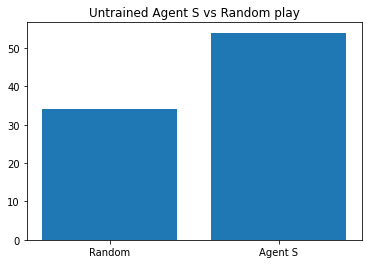

% U wins: 0.38636363636363635


In [14]:
if do_train_modelS == True:
    # plot game results
    df_training_stats = ttt.get_training_stats(df_all_played_games, df_training_stats, 0)

    x = np.arange(2)
    wins_list = df_training_stats.loc[0][['U_wins', 'S_wins']].to_list()

    fig, ax = plt.subplots()
    # ax.yaxis.set_major_formatter(formatter)
    plt.bar(x, wins_list)
    plt.xticks(x, ('Random', 'Agent S' ))
    
    # displaying the title 
    plt.title('Untrained Agent S vs Random play')
    plt.show()

    print('% U wins:', wins_list[0] / (wins_list[0] + wins_list[1]))

#### 2.2.2 Train Agent S: Load training data and train model
Train the neural network on the training data in *ifiles_UU* (Untrained Agent vs Untrained Agent).  <br>
Steps:
- Step 1: Get all the relevant gameplay data form the *ifiles_UU* list and save it in df_all_played_games.
- Step 2: Only include the winning moves and the moves to improve and append it into df_training_final.
- Step 3: From df_training_final create create a features file (X) and a labels file(y). 
- Step 4: Train the model (outcome is Agent S)
- Step 5: Evaluate the model by looking at the training accuracy and the gameplay of the trained agent vs an untrained agent (100 games).

In [15]:
if do_train_modelS == True:
    # train Agent S on U vs U data
    player_1 = 'U'
    player_2 = 'U'
    train_model_ind = 'S'
    training_files = ifiles_UU
    
    # train agent on already played data
    if len(training_files) > 0:                                                
        print('Play, Clean, Train', player_1, player_2)

        print('--- 1: Play ') 
        df_all_played_games = ttt.create_df_all_played_games()

        # Step 1: add training data from files generated
        for training_file in training_files:                                         
            print('       - File uploaded to dataframe: ', training_file) 
            df_all_played_games = df_all_played_games.append(pd.read_csv(training_file)) 

        print('--- 2: Clean ')   
        print('       - Winning moves... ') 
        # Step: 2.1 Get all the moves that leads to a win
        df_training = df_all_played_games[df_all_played_games['winner'] == df_all_played_games['nextPlayer']]
        df_training = df_training.reset_index(drop=True)

        print('       - Moves to improve... ')     
        # Step 2.2: Get moves to improve
        # call funtion to get moves that were improved because the game playes lead to a loss
        df_improve_moves = improve_moves(df_all_played_games)

        # Step 2.3: Prepare data on which training will be based
        df_training_final = ttt.create_df_all_played_games()
        df_training_final = df_training_final.append(df_training)
        df_training_final = df_training_final.append(df_improve_moves)
        df_training_final = df_training_final.dropna()

        print('       - Create X and Y... ')        
        # Step 3 prepare x and y
        filename_x, filename_y = dataframe_to_files_for_training(player_1, player_2, 1)    

        # Step 4 train model
        print('--- 3: Train ')        
        history, i_training_accuracy = train_the_model_from_file(filename_x, filename_y, modelS, train_model_ind, i_verbose=1, batchsize=100)
        print('       - Accuracy: ', i_training_accuracy) 
        print('')

        print('--- 4: Evaluate model S by use of selfplay ')        
        
        # Step 5 evaluate gameplay
        if train_model_ind == 'S':
            modelS = ttt.load_model(train_model_ind)
            modelS.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    
        else:
            modelL = ttt.load_model(train_model_ind)
            modelL.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    

        # the untrained agent plays 50 games as X and then 50 games as O
        ifile_evaluate = play_games_and_output_file(50, 1, 'U', train_model_ind, False)
        # read all files in list and save in dataframe df_all_played_games
        df_all_played_games = ttt.create_df_all_played_games()
        df_all_played_games = df_all_played_games.append(pd.read_csv(ifile_evaluate))
        os.remove(ifile_evaluate)
        df_all_played_games = df_all_played_games.dropna()

        # plot game results
        df_training_stats = ttt.get_training_stats(df_all_played_games, df_training_stats, 1)      #1 = US
        wins_list = df_training_stats.loc[1][['U_wins', 'S_wins']].to_list()

        x = np.arange(2)
        wins_list = df_training_stats.loc[1][['U_wins', 'S_wins']].to_list()
        print('       - U Wins: ', wins_list[0], ' | S Wins: ', wins_list[1])
        print('       - % U wins:', wins_list[0] / (wins_list[0] + wins_list[1]))                                 
        print('       - Training file created: ', ifile)
        print('')      
    else:
        print('No file found')

Play, Clean, Train U U
--- 1: Play 
       - File uploaded to dataframe:  TrainingData/games_played_UU_14022021192742.csv
       - File uploaded to dataframe:  TrainingData/games_played_UU_14022021193021.csv
       - File uploaded to dataframe:  TrainingData/games_played_UU_14022021200945.csv
       - File uploaded to dataframe:  TrainingData/games_played_UU_14022021201410.csv
       - File uploaded to dataframe:  TrainingData/games_played_UU_14022021201623.csv
       - File uploaded to dataframe:  TrainingData/games_played_UU_14022021202502.csv
--- 2: Clean 
       - Winning moves... 
       - Moves to improve... 
       - Create X and Y... 
       - Save X... TrainingData/iX_UU_1_.csv created
       - Save y... TrainingData/iY_UU_1_.csv created
--- 3: Train 
       - Load data to train AI agent...
       -  (2659806, 18)
       -  (2659806, 9)
Epoch 1/10
16039/16039 [==============================] - 16s 956us/step - loss: 1.6677 - accuracy: 0.3218 - val_loss: 1.5041 - val_accuracy: 

### 2.3 Agent S evaluation and conclusion<a id='_23'></a>
From the outcome it is clear that the trained agent (Agent S) is much beter than a untrained agent in paying Tic Tac Toe.  

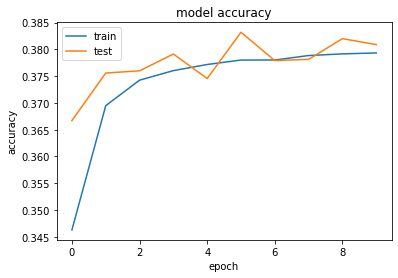

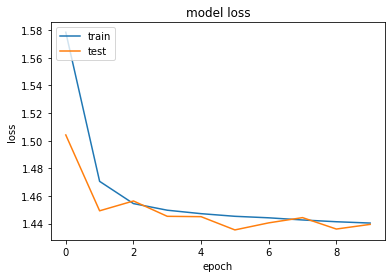

In [16]:
if do_train_modelS == True:
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

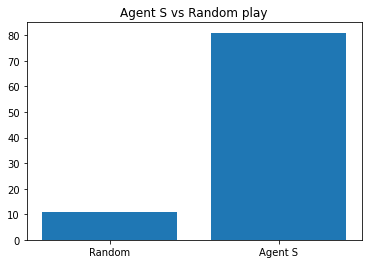

% U wins: 0.11956521739130435


In [17]:
if do_train_modelS == True:
    # plot game results
    df_training_stats = ttt.get_training_stats(df_all_played_games, df_training_stats, 1)

    x = np.arange(2)
    wins_list = df_training_stats.loc[1][['U_wins', 'S_wins']].to_list()

    fig, ax = plt.subplots()
    # ax.yaxis.set_major_formatter(formatter)
    plt.bar(x, wins_list)
    plt.xticks(x, ('Random', 'Agent S'))
    plt.title('Agent S vs Random play')    
    plt.show()
    print('% U wins:', wins_list[0] / (wins_list[0] + wins_list[1]))

The next section will improve on Agent S and create a new AI Agent called Agent L.

## 3. Generate training data and train Agent L (improvement on Agent S)<a id='_3'></a>
This section will train a neural net on game data that was generated by multiple type of gameplay. 
First it will generate data based on Agent S playing an untrained agent (3.1.1). Next it will generate data based on gameplay of Agent S against Agent S (3.1.2) and lastly it will generate test data of a Human playing against Agent S (3.1.3).  The output of this section will be a trained sequential neural net saved as Agent S (*modelAgentLinki.json* and *modelAgentLinki.h5*). 
### 3.1 Create training data<a id='_31'></a>
Selfplay will be used in order to generate game data. The output is a file that can be used as the basis for training a neural net. These cells create gameplay data by allowing an untrained agent to play against Agent S, Agent S playing against Agent S and Agent S playing Against a Human. It can be run multiple times to generate more gameplay data. 

#### 3.1.1 Create training data: Untrained Agent vs Agent S

Untrained Agent vs Agent S generates a file containing plays by the untrained agent based on random moves and Agent Sbased on the neural network output.  In order to use this file in training, the filename must be added in the *ifiles_US* array.

Untrained Agent (see *ttt.make_prediction_math(iboard, ynew)*):

        move = random.randint(1, 9)
        move_array = get_y(move)

Agent S (see in *make_prediction(curr_board, player, loaded_modelS, loaded_modelL)*):

        ynew = loaded_modelS.predict_proba(iX)        
        ynew[0] = ynew[0] ** gamma / np.sum(ynew[0] ** gamma)
        ynew[0] = np.around(ynew[0].astype(float), decimals=3)
        ynew[0] /= ynew[0].sum()
        ynew[0] = ynew[0] * irandomness        # allow some randomness
        out_ynew = np.random.multinomial(1, ynew[0])

In [ ]:
if do_gen_ifile_US is True:
    # create game data from gameplay of untrained agent against Agent S
    ifile_US = play_games_and_output_file(1000, 10, 'U', 'S', False)
    print(ifile_US)
else:
    print('Untrained Agent vs Agent S skipped')        

       - 1000 / 20000 games played... 19:51:04
       - 2000 / 20000 games played... 19:53:00
       - 3000 / 20000 games played... 19:54:58
       - 4000 / 20000 games played... 19:56:57
       - 5000 / 20000 games played... 19:58:52
       - 6000 / 20000 games played... 20:00:51
       - 7000 / 20000 games played... 20:02:46
       - 8000 / 20000 games played... 20:04:34
       - 9000 / 20000 games played... 20:06:13
       - 10000 / 20000 games played... 20:07:56
       - 11000 / 20000 games played... 20:09:34
       - 12000 / 20000 games played... 20:11:16
       - 13000 / 20000 games played... 20:12:55
       - 14000 / 20000 games played... 20:14:47
       - 15000 / 20000 games played... 20:16:40


#### 3.1.2 Create training data: Agent S vs Agent S
Agent S vs Agent S generates a file containing gameplays by Agent S against Agent S.  In order to use this file in training, the filename must be added in the *ifiles_SS* array.

In [ ]:
if do_gen_ifile_SS is True:
    # create game data from gameplay of Agent S vs against Agent S
    ifile_SS = play_games_and_output_file(1000, 10, 'S', 'S', False)
    print(ifile_SS)
else:
    print('Agent S vs Agent S skipped')    

#### 3.1.3 Create training data: Agent S vs Human
Agent S vs Human allows a human to play against Agent S and generates a file containing gameplays.  In order to use this file in training, the filename must be added in the *ifiles_SH* array.

In [ ]:
if do_gen_ifile_SH is True:

    df_concolidate = []
    
    # how many times to play against Agent S
    total_nr_h_vs_s = 1
    icount_h_vs_s = 0
    created_play_files_SH = []
    while icount_h_vs_s < total_nr_h_vs_s:
        icount_h_vs_s = icount_h_vs_s + 1
        ifile = play_games_and_output_file(1, 1, 'H', 'S', True, True, 10)
        created_play_files_SH.append(ifile) 

    df_concolidate = ttt.create_df_all_played_games()
           
    # append all files created into one dataframe
    for ifile_SH in created_play_files_SH:
        df_concolidate = df_concolidate.append(pd.read_csv(ifile))

    # clean up and delete files
    created_play_files_SH = list(dict.fromkeys(created_play_files_SH))    
    for ifile_SH in created_play_files_SH:  
        try:
            os.remove(ifile_SH)          
            print('       - ', ifile_SH, ' removed')
        except:
            print('       - could not delete', ifile)        

    ifile_SH = 'TrainingData/games_played_UH_all.csv'
    print('       - Human training file created: ', ifile_SH)
    df_concolidate.to_csv(ifile, index = False, header=True)     
    df_concolidate = ttt.create_df_all_played_games()
else:
    print('Agent S vs Human skipped')    

### 3.2 Train model L<a id='_32'></a>
#### 3.2.1 Train Agent L: Create neural network
This creates a Keras sequential neural network and saves it as *modelAgentLinki.json* and *modelAgentLinki.h5*.
Note that the input shape is 18 which is equal to the number of X columns. The output layer has a shape of 9, which is the same as the y columns. 

In [ ]:
if do_train_modelL == True:
    # remove the model 
    try:
        os.remove('modelAgentLinki.json')
    except:
        file_removed = True

    try:
        os.remove('modelAgentLinki.h5')
    except:
        file_removed = True    

    # Create Neural Net 
    modelL = Sequential()
    modelL.add(Dense(18, activation='relu', input_shape=(18,)))
    modelL.add(Dense(24, activation='relu'))          # Add one hidden layer    
    modelL.add(Dense(18, activation='relu'))          # Add one hidden layer        
    modelL.add(Dense(12, activation='relu'))          # Add one hidden layer
    modelL.add(Dense(12, activation='relu'))          # Add one hidden layer
    modelL.add(Dense(9, activation='softmax'))        # Add an output layer     //
    modelL.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # set the training model names for saving the trained model
    imodeljson = 'modelAgentLinki.json'
    imodelh5 = 'modelAgentLinki.h5'    

    # save the training model to a file
    model_json = modelL.to_json()
    with open(imodeljson, "w") as json_file:
        json_file.write(model_json)

    # serialize weights to HDF5
    modelL.save_weights(imodelh5)

else:
    modelL = ttt.load_model('L')
    modelL.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   

modelL.summary()

#### 3.3.2 Train Agent L: Load training data and train model
Train the neural network on the training data in *ifiles_UU*, *ifiles_US*, *ifiles_SS*, *ifiles_UH*.  <br>
Steps:
- Step 1: Get all the relevant gameplay data form the *ifiles_UU*, *ifiles_US*, *ifiles_SS*, *ifiles_UH* lists and save it in df_all_played_games.
- Step 2: Only include the winning moves and the moves to improve and append it into df_training_final.
- Step 3: From df_training_final create create a features file (X) and a labels file(y). 
- Step 4: Train the model (outcome is Agent L).
- Step 5: Evaluate the model by looking at the training accuracy and the gameplay of the trained agent vs an untrained agent (100 games).

In [ ]:
if do_train_modelL == True:
    # train Agent S on U vs U data
    player_1 = 'U'
    player_2 = 'L'
    train_model_ind = 'L'
    
    training_files = ifiles_US + ifiles_SS + ifiles_UH 
   
    # train agent on already played data
    if len(training_files) > 0:                                                
        print('Play, Clean, Train', player_1, player_2)

        print('--- 1: Play ') 
        df_all_played_games = ttt.create_df_all_played_games()

        # add training data from files generated
        for training_file in training_files:                                         
            print('       - File uploaded to dataframe: ', training_file) 
            df_all_played_games = df_all_played_games.append(pd.read_csv(training_file)) 

        print('--- 2: Clean ')   
        print('       - Winning moves... ') 
        # Step: 2.1 Get all the moves that leads to a win
        df_training = df_all_played_games[df_all_played_games['winner'] == df_all_played_games['nextPlayer']]
        df_training = df_training.reset_index(drop=True)

        print('       - Moves to improve... ')     
        # Step 2.2: Get moves to improve
        # call funtion to get moves that were improved because the game playes lead to a loss
        df_improve_moves = improve_moves(df_all_played_games)

        # Step 2.3: Prepare data on which training will be based
        df_training_final = ttt.create_df_all_played_games()
        df_training_final = df_training_final.append(df_training)
        df_training_final = df_training_final.append(df_improve_moves)
        df_training_final = df_training_final.dropna()

        print('       - Create X and Y... ')        
        # Step 3 prepare x and y
        filename_x, filename_y = dataframe_to_files_for_training(player_1, player_2, 1)    

        # Step 4 train model
        print('--- 3: Train ')        
        history, i_training_accuracy = train_the_model_from_file(filename_x, filename_y, modelL, train_model_ind, i_verbose=1, batchsize=400)
        print('       - Accuracy: ', i_training_accuracy) 
        print('')

        print('--- 4: Evaluate model L by use of selfplay ')        
        
        # Step 5 evaluate gameplay
        if train_model_ind == 'S':
            modelS = ttt.load_model(train_model_ind)
            modelS.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    
        else:
            modelL = ttt.load_model(train_model_ind)
            modelL.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    

        # the untrained agent plays 50 games as X and then 50 games as O
        ifile_evaluate = play_games_and_output_file(50, 1, 'U', train_model_ind, False)
        # read all files in list and save in dataframe df_all_played_games
        df_all_played_games = ttt.create_df_all_played_games()
        df_all_played_games = df_all_played_games.append(pd.read_csv(ifile_evaluate))
        os.remove(ifile_evaluate)
        df_all_played_games = df_all_played_games.dropna()

        # plot game results
        df_training_stats = ttt.get_training_stats(df_all_played_games, df_training_stats, 2)      #2 = UL
        wins_list = df_training_stats.loc[2][['U_wins', 'S_wins', 'L_wins']].to_list()

        x = np.arange(3)
        wins_list = df_training_stats.loc[2][['U_wins', 'S_wins', 'L_wins']].to_list()
        print('       - U Wins: ', wins_list[0], ' | S Wins: ', wins_list[1], ' | L Wins: ', wins_list[2])
        print('       - % U wins:', wins_list[0] / (wins_list[0] + wins_list[1] + wins_list[2]))                                 
        print('')      
    else:
        print('No file found')

### 3.3 Agent L evaluation and conclusion<a id='_33'></a>

How did the model do in terms of training accuracy:

In [ ]:
if do_train_modelL == True:
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

The accuracy of the model did increase, however it is not close to 90%, this canbe expected as there are a very high numer of different outcomes for a spesific board that will lead to a win.  The neural network should return the most likely play that will lead to a win. 

Lets look at a more pragmatic way to evaluate the agents ability to play Tic Tac Toe:<br>

<strong>How did Agent S do against an untrained agent?</strong>

In [ ]:
if do_train_modelL == True:
    # plot game results
    df_training_stats = ttt.get_training_stats(df_all_played_games, df_training_stats, 2)

    x = np.arange(3)
    wins_list = df_training_stats.loc[2][['U_wins', 'S_wins', 'L_wins']].to_list()

    fig, ax = plt.subplots()
    # ax.yaxis.set_major_formatter(formatter)
    plt.bar(x, wins_list)
    plt.xticks(x, ('Random', 'Agent S', 'Agent L'))
    plt.title('Agent L vs Random play')    
    plt.show()
    print('% U wins:', wins_list[0] / (wins_list[0] + wins_list[1] + wins_list[2]))

<strong>Lets check in more detail...</strong><br>
An untrained agent will play Tic Tac Toe against a Agent L. The untrained agent wins and trained agent wins are recorded.<br>

<strong>Metric</strong><br>
The data provided generated contains the untrained agent wins and trained agent wins. 
The metric used in order to determine which player is better at playing Tic Tac Toe.
<br>

<strong>Objective</strong><br>
The objective is to check if the trained agent is signitifantly better at playing Tic Tac Toe than an untrained Agent. 
<br>

<strong>Hypothesis</strong><br>
H0: trained_agent_wins - unrained_agent_wins = 0 <br>
H1: trained_agent_wins - unrained_agent_wins > 0    

<strong>Steps: </strong>
    
1. Compute the <strong>observed difference</strong> between the metric, trained agent wins and untrained agent wins.<br>
2. <strong>Simulate the sampling distribution</strong> for the difference in trained agent wins and untrained agent wins. This is done by making use of bootstrapping.<br>
3. Used this sampling distribution to <strong>simulate the distribution under the null hypothesis</strong>, by creating a random normal distribution centered at 0 with the same spread and size.<br>
4. Compute the p-value by finding the proportion of values in the null distribution that were greater than our observed difference.<br>
5. Used this p-value to determine the statistical significance of our observed difference.<br>

#### 3.3.0 Prepare data

In [ ]:
def label_U_win (row):
    if row['xPlayer'] == 'U' and row['winner'] == 'X':
        return 1
    elif row['oPlayer'] == 'U' and row['winner'] == 'O':
        return 1   
    else:
        return 0        
    
def label_L_win (row):
    if row['xPlayer'] == 'L' and row['winner'] == 'X':
        return 1
    elif row['oPlayer'] == 'L' and row['winner'] == 'O':
        return 1   
    else:
        return 0        

if do_final_evaluL is True:
    ifile_evaluate = play_games_and_output_file(500, 1, 'U', train_model_ind, False)
    # read all files in list and save in dataframe df_all_played_games
    df_all_played_games = ttt.create_df_all_played_games()
    df_all_played_games = df_all_played_games.append(pd.read_csv(ifile_evaluate))
    os.remove(ifile_evaluate)
    df_all_played_games = df_all_played_games.dropna()
    
    # get all games
    df_games = df_all_played_games.groupby('gameNr')
    df_games = df_games.first()    
       
    df_games['U_win'] = df_games.apply (lambda row: label_U_win(row), axis=1)
    df_games['L_win'] = df_games.apply (lambda row: label_L_win(row), axis=1)    
        
    # dataframe containing indicators.  1 indicates a win.  
    df_games = pd.DataFrame({"L_Win":df_games['L_win'].tolist(), 
                            "U_Win":df_games['U_win'].tolist()})

#### 3.3.1 Computed the observed difference

In [ ]:
if do_final_evaluL is True:
    obs_diff = df_games['L_Win'].sum() - df_games['U_Win'].sum()
    print(obs_diff)

#### 3.3.2 Simulate the sampling distribution.

In [ ]:
# create sampling distribution of difference between number of wins by trained agent vs untrained agent
if do_final_evaluL is True:
    diffs = []
    for _ in range(10000):
        df_sample = df_games.sample(df_games.shape[0], replace = True)
        sample_diff = df_sample['L_Win'].sum() - df_sample['U_Win'].sum()

        diffs.append(sample_diff)

In [ ]:
# convert to numpy array
if do_final_evaluL is True:
    diffs = np.array(diffs)
    diffs.std()

In [ ]:
# plot sampling distribution
if do_final_evaluL is True:
    plt.hist(diffs);
    plt.axvline(x=obs_diff, color='red');

#### 3.3.3 Simulate the distribution under the null hypothesis

In [ ]:
# simulate distribution under the null hypothesis
if do_final_evaluL is True:
    null_vals = np.random.normal(0, diffs.std(), diffs.size)

In [ ]:
# plot null distribution
if do_final_evaluL is True:
    plt.hist(null_vals);

    # plot line for observed statistic
    plt.axvline(x=obs_diff, color='red');

#### 3.3.4. Compute the p-value 

In [ ]:
# compute p value
if do_final_evaluL is True:
    p_value = (null_vals > obs_diff).mean()
    print(p_value)

#### 3.3.5 Use p-value to determine the statistical significance of our observed difference

In [ ]:
if do_final_evaluL is True:
    if p_value < 0.01:
        print('reject H0')
    else:
        print('fail to reject H0')

## 4. Conclusion<a id='_4'></a>
### 4.1 Evaluate AI agents<a id='_41'></a>
Looking at the training accuracy, it seems like the model is not fitting that well.  However, it should be noted that there are a number of different ways to win a game of Tic Tac Toe and therefore it is very unlikely to get to a high training accuracy.  A move pragmatic way to look at the models effectiveness is to look at hos well it plays the game of Tic TAc Toe against the untrained agent. 

In [ ]:
if do_train_modelL == True:
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    

From below, it is clear the the models ability to play Tic Tac Toe imrproved through the training cycles. 

In [ ]:
u_wins = df_training_stats['U_wins'].to_list()
s_wins = df_training_stats['S_wins'].to_list()
l_wins = df_training_stats['L_wins'].to_list()

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = u_wins
bars2 = s_wins
bars3 = l_wins
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1,  width=barWidth, edgecolor='white', label='Untrained Agent') #var1
plt.bar(r2, bars2,  width=barWidth, edgecolor='white', label='Agent S') #var2
plt.bar(r3, bars3,  width=barWidth, edgecolor='white', label='Agent L') #var3
 
# Add xticks on the middle of the group bars
plt.xlabel('Wins by agent', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['before training', 'After training Agent S', 'After training Agent L'])
plt.legend()
plt.show()

Out of the test done in 3.3, it is also confirmed that the <strong>H0</strong> hypothesis is rejected at a 0.01% level of significance.  Therefore it can be accepted that Agent L is better at laying Tic Tac Toe than an untrained agent.


### 4.2 Play against Agent L<a id='_42'></a>
Play the against the AI agent to evaluate the AI agents ability to play Tic Tac Toe.  

In [ ]:
number_of_games = 1
if number_of_games > 0:
    
    # Play Tic Tac Toe against Agent L
    ifile_HL = play_games_and_output_file(1, 1, 'H', 'L', True)
    try:
        os.remove(ifile_HL)
    except:
        file_removed = True    